In [13]:
import matplotlib.pyplot as plt
import numpy as np

from DRAAF_pipeline.etl import ETLPipeline
from DRAAF_pipeline.graph_manager import GraphManager, GenericPlotter
from DRAAF_pipeline.metric_engine import MetricEngine

In [14]:
workspace_name = "msdq_sensitivity_analysis_workspace"
data_sources = [
    "MSDQ_Sensitivity_Analysis-m=3,distribution=exponential,alpha=0.3,k=1",
    "MSDQ_Sensitivity_Analysis-m=5,distribution=exponential,alpha=0.3,k=1",
    "MSDQ_Sensitivity_Analysis-m=7,distribution=exponential,alpha=0.3,k=1",
    "MSDQ_Sensitivity_Analysis-m=9,distribution=exponential,alpha=0.3,k=1",
    "MSDQ_Sensitivity_Analysis-m=12,distribution=exponential,alpha=0.3,k=1",
    "MSDQ_Sensitivity_Analysis-m=15,distribution=exponential,alpha=0.3,k=1",
    "MSDQ_Sensitivity_Analysis-m=18,distribution=exponential,alpha=0.3,k=1",
    "MSDQ_Sensitivity_Analysis-m=21,distribution=exponential,alpha=0.3,k=1",
    "MSDQ_Sensitivity_Analysis-m=24,distribution=exponential,alpha=0.3,k=1",
    "MSDQ_Sensitivity_Analysis-m=27,distribution=exponential,alpha=0.3,k=1",
    "MSDQ_Sensitivity_Analysis-m=31,distribution=exponential,alpha=0.3,k=1",
    "MSDQ_Sensitivity_Analysis-m=41,distribution=exponential,alpha=0.3,k=1",
    # "MSDQ_Sensitivity_Analysis-m=51,distribution=exponential,alpha=0.3,k=1",
]
node_counts = [10, 50, 100, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000]

In [15]:
data_source_to_protocol = {
    "MSDQ_Sensitivity_Analysis-m=3,distribution=exponential,alpha=0.3,k=1": "MSDQ",
    "MSDQ_Sensitivity_Analysis-m=5,distribution=exponential,alpha=0.3,k=1": "MSDQ",
    "MSDQ_Sensitivity_Analysis-m=7,distribution=exponential,alpha=0.3,k=1": "MSDQ",
    "MSDQ_Sensitivity_Analysis-m=9,distribution=exponential,alpha=0.3,k=1": "MSDQ",
    "MSDQ_Sensitivity_Analysis-m=12,distribution=exponential,alpha=0.3,k=1": "MSDQ",
    "MSDQ_Sensitivity_Analysis-m=15,distribution=exponential,alpha=0.3,k=1": "MSDQ",
    "MSDQ_Sensitivity_Analysis-m=18,distribution=exponential,alpha=0.3,k=1": "MSDQ",
    "MSDQ_Sensitivity_Analysis-m=21,distribution=exponential,alpha=0.3,k=1": "MSDQ",
    "MSDQ_Sensitivity_Analysis-m=24,distribution=exponential,alpha=0.3,k=1": "MSDQ",
    "MSDQ_Sensitivity_Analysis-m=27,distribution=exponential,alpha=0.3,k=1": "MSDQ",
    "MSDQ_Sensitivity_Analysis-m=31,distribution=exponential,alpha=0.3,k=1": "MSDQ",
    "MSDQ_Sensitivity_Analysis-m=41,distribution=exponential,alpha=0.3,k=1": "MSDQ",
    # "MSDQ_Sensitivity_Analysis-m=51,distribution=exponential,alpha=0.3,k=1": "MSDQ",
}
ETLPipeline(data_sources, data_source_to_protocol, node_counts, workspace_name).extract().transform().load()

Starting extract phase
Processing data source: MSDQ_Sensitivity_Analysis-m=3,distribution=exponential,alpha=0.3,k=1
Data source path: /home/jason/Code/research-paper-analysis/DRAAF_pipeline/data_sources/MSDQ_Sensitivity_Analysis-m=3,distribution=exponential,alpha=0.3,k=1/data
Processing data source: MSDQ_Sensitivity_Analysis-m=5,distribution=exponential,alpha=0.3,k=1
Data source path: /home/jason/Code/research-paper-analysis/DRAAF_pipeline/data_sources/MSDQ_Sensitivity_Analysis-m=5,distribution=exponential,alpha=0.3,k=1/data
Processing data source: MSDQ_Sensitivity_Analysis-m=7,distribution=exponential,alpha=0.3,k=1
Data source path: /home/jason/Code/research-paper-analysis/DRAAF_pipeline/data_sources/MSDQ_Sensitivity_Analysis-m=7,distribution=exponential,alpha=0.3,k=1/data
Processing data source: MSDQ_Sensitivity_Analysis-m=9,distribution=exponential,alpha=0.3,k=1
Data source path: /home/jason/Code/research-paper-analysis/DRAAF_pipeline/data_sources/MSDQ_Sensitivity_Analysis-m=9,distr

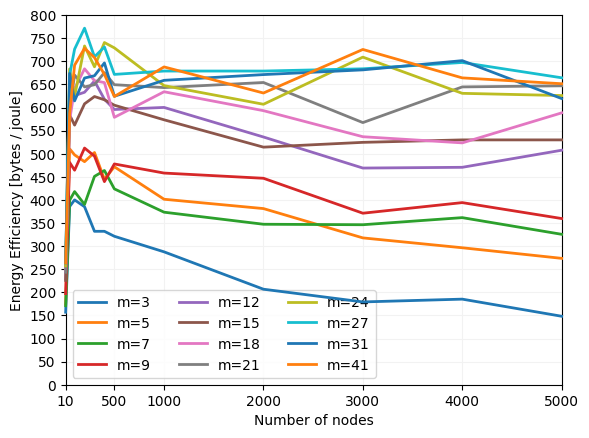

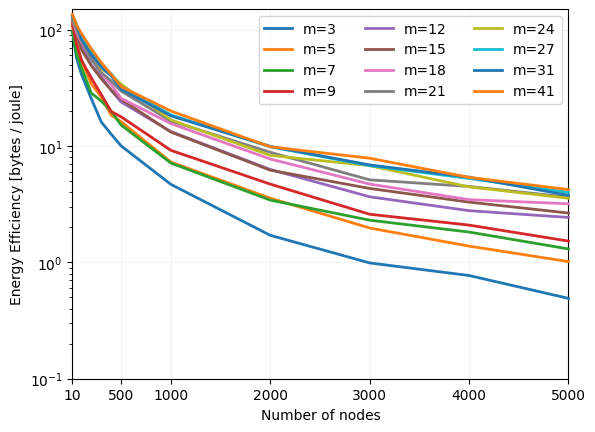

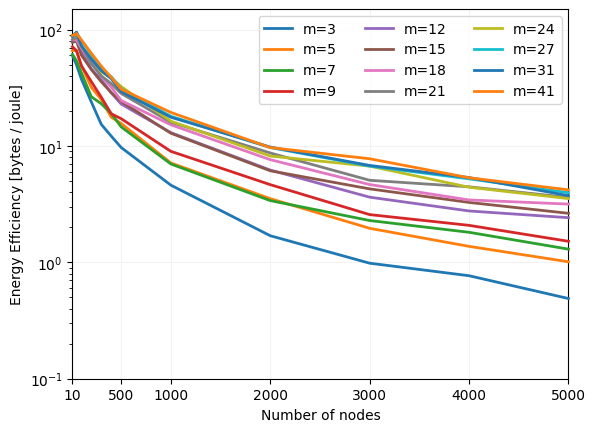

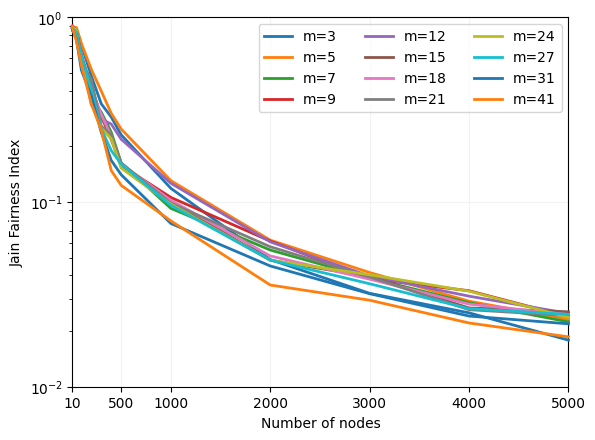

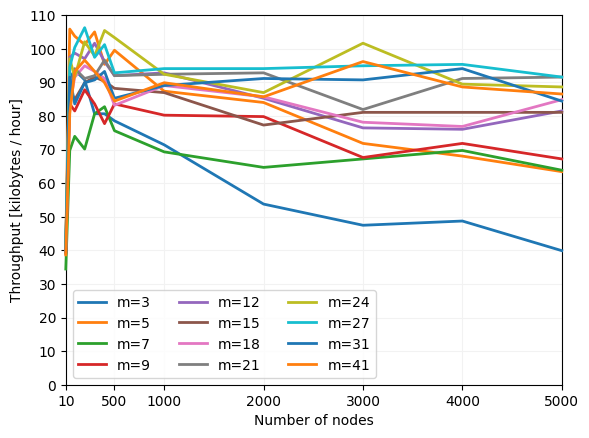

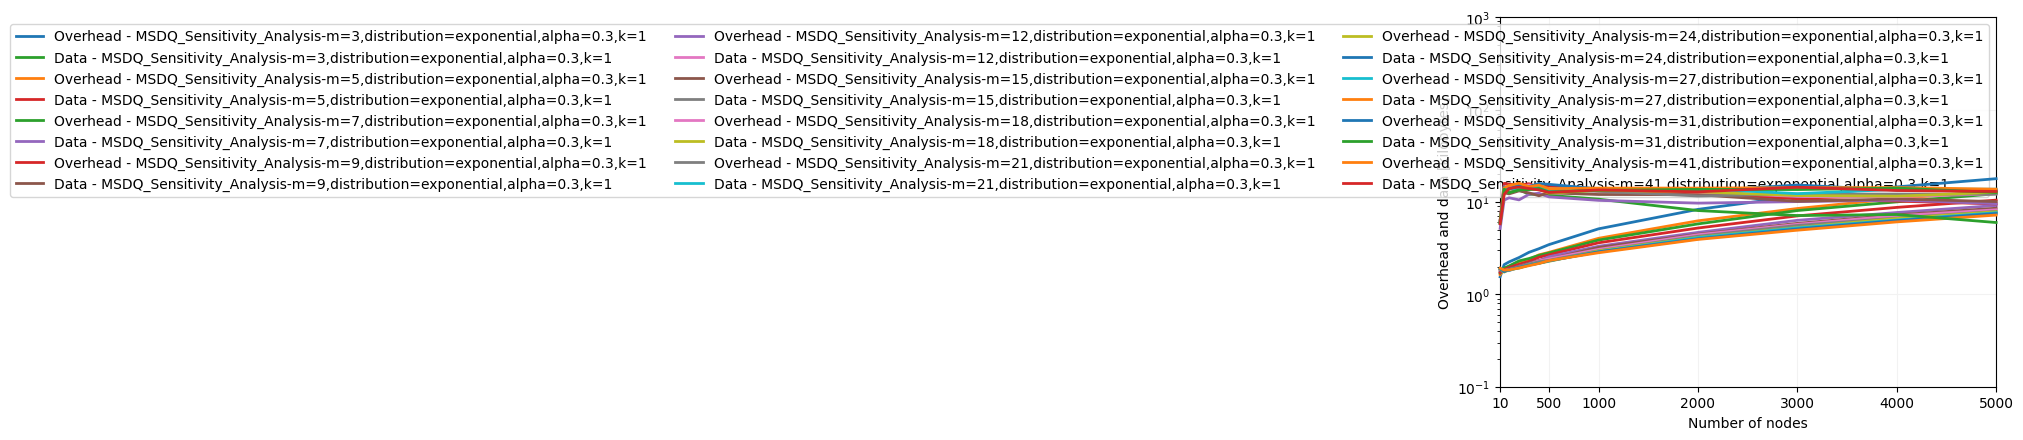

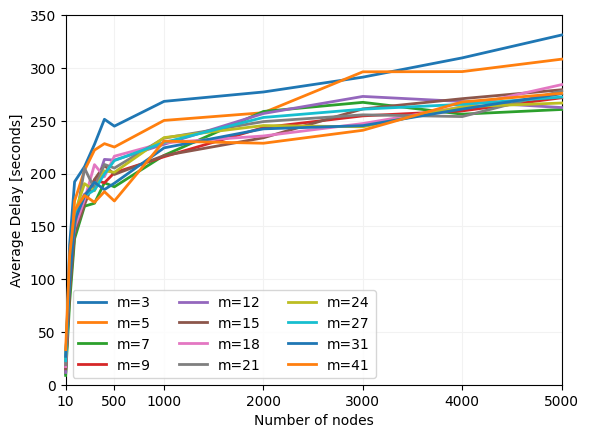

In [16]:
graph_manager = GraphManager(workspace_name)

def plot(metric_names, label, ylims, is_log=False, show_metric_name=False):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    values = []
    for data_source in graph_manager.metric_data:
        values.append((graph_manager.metric_data[data_source]["5000"][metric_names[0]][0], data_source))

    values.sort(reverse=True)
    if metric_names[0] == "Average Delay [seconds]":
        values.sort()
    # pprint.pprint(values)
    values = values[:20]
    # Uncomment to show values
    # pprint.pprint(values)
    values = [value[1] for value in values]

    for metric in metric_names:
        for index, data_source in enumerate(graph_manager.metric_data):
            x = node_counts
            ys = [graph_manager.metric_data[data_source][str(node_count)][metric] for node_count in x]
            y = [np.average(y) for y in ys]

            if data_source in values:
                parts = data_source.split('-')[1].split(',')
                # key_label = f"{parts[0]},{','.join(parts[2:])}" if not show_metric_name else f"{metric} - {data_source}"
                key_label = f"{parts[0]}" if not show_metric_name else f"{metric} - {data_source}"
                plt.plot(x, y, label=key_label, zorder=999, clip_on=False, linewidth=2)
            else:
                color = "#999999"
                zorder = 2
                if index == len(graph_manager.metric_data) - 1 and metric == metric_names[-1]:
                    key_label = "Other"
                else:
                    key_label = "_nolegend_"

                plt.plot(x, y, label=key_label, color=color, zorder=zorder, clip_on=False)

    if "Energy Efficiency" in label:
        y_label = "Energy Efficiency [bytes / joule]"
    else:
        y_label = label
    plt.ylabel(y_label)
    plt.xlabel("Number of nodes")
    # plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

    handles, labels = ax.get_legend_handles_labels()
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: int(t[0].split("=")[1].split(",")[0])))
    ax.legend(handles, labels, ncol=3)

    plt.grid(linestyle='-', color='0.95')

    if is_log:
        plt.yscale("log")

    plt.ylim(ylims[0], ylims[1])
    plt.xlim(10, 5000)

    x_ticks = np.append(ax.get_xticks()[1:], 10)
    x_ticks = np.append(x_ticks, 500)
    ax.set_xticks(x_ticks)

    if not is_log:
        ax.set_yticks(np.arange(ylims[0], ylims[1] + 1, 50))
        if len(ax.get_yticks()) < 5:
            ax.set_yticks(np.arange(ylims[0], ylims[1] + 1, 10))

    file_name =  f"sensitivity_analysis_{label.replace(' ', '_').replace('/', '_')}"
    graph_manager.save_plot(file_name)

plot([MetricEngine.SATELLITE_ENERGY_EFFICIENCY], MetricEngine.SATELLITE_ENERGY_EFFICIENCY, [0, 800], False)

plot([MetricEngine.AVG_NODE_ENERGY_EFFICIENCY], MetricEngine.AVG_NODE_ENERGY_EFFICIENCY, [0.1, 150], True)

plot([MetricEngine.NETWORK_ENERGY_EFFICIENCY], MetricEngine.NETWORK_ENERGY_EFFICIENCY, [0.1, 150], True)

plot([MetricEngine.JFI], MetricEngine.JFI, [0.01, 1], True)

plot([MetricEngine.THROUGHPUT], MetricEngine.THROUGHPUT, [0, 110])

plot([MetricEngine.OVERHEAD, MetricEngine.DATA], "Overhead and data [kilobytes]", [0.1, 1000], True, True)

plot([MetricEngine.AVERAGE_DELAY], MetricEngine.AVERAGE_DELAY, [0, 350])